In [ ]:
# StewartStack
# Data Cleaning and ML learning for CS 
# 12/04/2023

### === Understanding the Data ===


### === The Dataset ===

#### === Importing libraries & creating settings ===

In [41]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable the display of matplotlib plots directly in the Jupyter Notebook
%matplotlib inline

# Set the default figure size for matplotlib plots
plt.rcParams['figure.figsize'] = (12, 8)

# Set the maximum number of columns to display in a DataFrame to 120
pd.set_option('display.max_columns', 120)

# Set the maximum width of each column to display in a DataFrame to 5000 characters
pd.set_option('display.max_colwidth', 5000)


In [42]:
# Loading in csv file and using skiprow()
# Row 1 contains a link & sits above the series headings.
# Removing so the data can be parsed properly
loans_2007 = pd.read_csv('lending_club_loans.csv', skiprows = 1, low_memory = False)

In [43]:
loans_2007.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,Sep-16,744.0,740.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0.0,Apr-99,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.40%,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-16,499.0,0.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.50%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,NaN,Sep-16,719.0,715.0,0.0,NaN

#### === Thresh ===

In [44]:
# Remove all columns with more than 50% missing values & 2 columns which are not needed
# Reassign in both cases
# Calculate the half of the total number of rows in the 'loans_2007' DataFrame
half_count  = len(loans_2007) / 2
# Drop the columns in the 'loans_2007' DataFrame that have more than half_count missing values
loans_2007 = loans_2007.dropna(thresh = half_count, axis = 1)
# Drop the 'url' and 'desc' columns from the 'loans_2007' DataFrame
loans_2007 = loans_2007.drop(['url', 'desc'], axis = 1)

In [45]:
# checking the shape
loans_2007.shape

(42542, 56)

In [46]:
# checking the columns count again
loans_2007.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,735.0,739.0,1.0,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,Sep-16,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-99,740.0,744.0,5.0,3.0,0.0,1687.0,9.40%,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-16,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,735.0,739.0,2.0,2.0,0.0,2956.0,98.50%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,Sep-16,719.0,715.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [47]:
# checking info
loans_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42542 entries, 0 to 42541
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          42538 non-null  object 
 1   member_id                   42535 non-null  float64
 2   loan_amnt                   42535 non-null  float64
 3   funded_amnt                 42535 non-null  float64
 4   funded_amnt_inv             42535 non-null  float64
 5   term                        42535 non-null  object 
 6   int_rate                    42535 non-null  object 
 7   installment                 42535 non-null  float64
 8   grade                       42535 non-null  object 
 9   sub_grade                   42535 non-null  object 
 10  emp_title                   39909 non-null  object 
 11  emp_length                  41423 non-null  object 
 12  home_ownership              42535 non-null  object 
 13  annual_inc                  425

### === Data Dictionary ===

In [48]:
# read the DD, check number of rows, get column names
data_dictionary = pd.read_csv('LCDataDictionary.csv')
print(data_dictionary.shape[0])
print(data_dictionary.columns.tolist())

115
['LoanStatNew', 'Description']


In [49]:
# Renaming series for clarity and consistency
data_dictionary = data_dictionary.rename(columns={'LoanStatNew': 'name', 'Description': 'description'})

In [50]:
# Viewing the results
data_dictionary.head()

,name,description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.


In [51]:
# merge()
# merge the data dictionary with part of loans. Assign it new variable
# Create a DataFrame of the data types of columns in the 'loans_2007' DataFrame
loans_2007_dtypes = pd.DataFrame(loans_2007.dtypes, columns=['dtypes'])

# Reset the index of the 'loans_2007_dtypes' DataFrame and add the index as a new column named 'name'
loans_2007_dtypes = loans_2007_dtypes.reset_index()
loans_2007_dtypes['name'] = loans_2007_dtypes['index']

# Rearrange the columns in the 'loans_2007_dtypes' DataFrame
loans_2007_dtypes  = loans_2007_dtypes[['name', 'dtypes']]

# Add a new column 'first value' to the 'loans_2007_dtypes' DataFrame, containing the first value of each column in the 'loans_2007' DataFrame
loans_2007_dtypes['first value'] = loans_2007.loc[0].values

# Merge the 'loans_2007_dtypes' DataFrame with the 'data_dictionary' DataFrame, matching on the 'name' column
preview = loans_2007_dtypes.merge(data_dictionary, on='name', how='left')


### === Select Data for Cleaning using Dictionary ===


In [52]:
# First group of columns
preview[:19]

,name,dtypes,first value,description
0,id,object,1077501,A unique LC assigned ID for the loan listing.
1,member_id,float64,1296599.0,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,5000.0,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,float64,5000.0,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,4975.0,The total amount committed by investors for that loan at that point in time.
5,term,object,36 months,The number of payments on the loan. Values are in months and can be either 36 or 60.
6,int_rate,object,10.65%,Interest Rate on the loan
7,installment,float64,162.87,The monthly payment owed by the borrower if the loan originates.
8,grade,object,B,LC assigned loan grade
9,sub_grade,object,B2,LC assigned loan subgrade


In [53]:
loans_2007.shape

(42542, 56)

In [54]:
# first drop - 8 columns
# These are not needed
drop_one = ['id','member_id','funded_amnt','funded_amnt_inv','int_rate','sub_grade','emp_title','issue_d']
# Prevents error 
loans_2007 = loans_2007.drop(drop_one, errors='ignore',axis=1)

In [55]:
loans_2007.shape

(42542, 48)

In [56]:
# Second group of columns
preview[19:38]

,name,dtypes,first value,description
19,title,object,Computer,The loan title provided by the borrower
20,zip_code,object,860xx,The first 3 numbers of the zip code provided by the borrower in the loan application.
21,addr_state,object,AZ,The state provided by the borrower in the loan application
22,dti,float64,27.65,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
23,delinq_2yrs,float64,0.0,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
24,earliest_cr_line,object,Jan-85,The month the borrower's earliest reported credit line was opened
25,fico_range_low,float64,735.0,The lower boundary range the borrower’s FICO at loan origination belongs to.
26,fico_range_high,float64,739.0,The upper boundary range the borrower’s FICO at loan origination belongs to.
27,inq_last_6mths,float64,1.0,The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
28,open_acc,float64,3.0,The number of open credit lines in the borrower's credit file.


In [57]:
# Second drop - 5 columns
drop_two = [ 'zip_code','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv']

loans_2007 = loans_2007.drop(drop_two,errors='ignore',axis=1)

In [58]:
loans_2007.shape

(42542, 43)

In [59]:
# Third group of columns
preview[38:]

,name,dtypes,first value,description
38,total_rec_prncp,float64,5000.0,Principal received to date
39,total_rec_int,float64,863.16,Interest received to date
40,total_rec_late_fee,float64,0.0,Late fees received to date
41,recoveries,float64,0.0,post charge off gross recovery
42,collection_recovery_fee,float64,0.0,post charge off collection fee
43,last_pymnt_d,object,Jan-15,Last month payment was received
44,last_pymnt_amnt,float64,171.62,Last total payment amount received
45,last_credit_pull_d,object,Sep-16,The most recent month LC pulled credit for this loan
46,last_fico_range_high,float64,744.0,The upper boundary range the borrower’s last FICO pulled belongs to.
47,last_fico_range_low,float64,740.0,The lower boundary range the borrower’s last FICO pulled belongs to.


In [62]:
# Third Group of columns to be dropped - 7
drop_three = ['total_rec_prncp','total_rec_int', 'total_rec_late_fee','recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt']

loans_2007 = loans_2007.drop(drop_three, errors = 'ignore', axis = 1)

In [63]:
loans_2007.shape

(42542, 36)

In [66]:
preview[:]

,name,dtypes,first value,description
0,id,object,1077501,A unique LC assigned ID for the loan listing.
1,member_id,float64,1296599.0,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,5000.0,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,float64,5000.0,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,4975.0,The total amount committed by investors for that loan at that point in time.
5,term,object,36 months,The number of payments on the loan. Values are in months and can be either 36 or 60.
6,int_rate,object,10.65%,Interest Rate on the loan
7,installment,float64,162.87,The monthly payment owed by the borrower if the loan originates.
8,grade,object,B,LC assigned loan grade
9,sub_grade,object,B2,LC assigned loan subgrade


In [69]:
# Changing title to loan_title as a bit more appropriate
loans_2007.rename(columns = {'title' : 'loan_title'}, inplace = True)
loans_2007.head(3)

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,loan_title,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,36 months,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,n,credit_card,Computer,AZ,27.65,0.0,Jan-85,735.0,739.0,1.0,3.0,0.0,13648.0,83.70%,9.0,f,Sep-16,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,car,bike,GA,1.00,0.0,Apr-99,740.0,744.0,5.0,3.0,0.0,1687.0,9.40%,4.0,f,Sep-16,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,2400.0,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,small_business,real estate business,IL,8.72,0.0,Nov-01,735.0,739.0,2.0,2.0,0.0,2956.0,98.50%,10.0,f,Sep-16,719.0,715.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


### === Investigating FICO Score Columns ===


In [70]:
# unique FICO's
print('low', loans_2007['fico_range_low'].unique())
print('\nhigh', loans_2007['fico_range_high'].unique())

low [735. 740. 690. 695. 730. 660. 675. 725. 710. 705. 720. 665. 670. 760.
 685. 755. 680. 700. 790. 750. 715. 765. 745. 770. 780. 775. 795. 810.
 800. 815. 785. 805. 825. 820. 630. 625.  nan 650. 655. 645. 640. 635.
 610. 620. 615.]

high [739. 744. 694. 699. 734. 664. 679. 729. 714. 709. 724. 669. 674. 764.
 689. 759. 684. 704. 794. 754. 719. 769. 749. 774. 784. 779. 799. 814.
 804. 819. 789. 809. 829. 824. 634. 629.  nan 654. 659. 649. 644. 639.
 614. 624. 619.]


In [71]:
# Comparing fico_low max & min
print('fico low max', loans_2007['fico_range_low'].max())
print('fico low min', loans_2007['fico_range_low'].min())

fico low max 825.0
fico low min 610.0


In [72]:
# comparing fico_high max & min
print('fico high max', loans_2007['fico_range_high'].max())
print('fico high min', loans_2007['fico_range_high'].min())

fico high max 829.0
fico high min 614.0


In [73]:
# isnull()
# Checking for null values as want the average to be accurate
loans_2007['fico_range_high'].isnull().values.sum(0)

7

In [74]:
loans_2007['fico_range_low'].isnull().values.sum(0)

7

In [75]:
# Removing the nulls
# creating a variable & assigning the 2 series to it
# Checking the initial number of rows
# drop rows with missing values for fico high/fico low
# check number of rows again
fico_columns = ['fico_range_high', 'fico_range_low']
print('check rows', loans_2007.shape[0])
loans_2007.dropna(subset = fico_columns, inplace = True)
print('check rows after drop', loans_2007.shape[0])

check rows 42542
check rows after drop 42535


In [76]:
# calculating the mean of fico high/fico low
loans_2007['fico_average'] = (loans_2007['fico_range_high'] + loans_2007['fico_range_low']) / 2
cols = ['fico_range_low', 'fico_range_high', 'fico_average']
loans_2007[cols].head() 

,fico_range_low,fico_range_high,fico_average
0,735.0,739.0,737.0
1,740.0,744.0,742.0
2,735.0,739.0,737.0
3,690.0,694.0,692.0
4,695.0,699.0,697.0


In [77]:
# Dropping unneeded fico columns
drop_cols = ['fico_range_low', 'fico_range_high', 'last_fico_range_low', 'last_fico_range_high']
loans_2007 = loans_2007.drop(drop_cols, errors = 'ignore', axis = 1)
loans_2007.shape

(42535, 33)

#### === Target Column ===

In [78]:
# Using preview to check the dataframe on the 'loan_status' series
preview[preview.name == 'loan_status']

,name,dtypes,first value,description
16,loan_status,object,Fully Paid,Current status of the loan


In [79]:
# value counts()
# Returning the frequency of the unique values in the loan_status
loans_2007['loan_status'].value_counts()

Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

In [80]:
# Using replace() and bitwise
# Having to use this because in pandas using OR will produce ValueError
loans_2007 = loans_2007[(loans_2007['loan_status'] == 'Fully Paid') | (loans_2007['loan_status'] == 'Charged Off')]
new_status = {'loan_status' : {'Fully Paid': 1, 'Charged Off': 0}}
loans_2007 = loans_2007.replace(new_status)
loans_2007.shape

(39239, 33)

In [81]:
loans_2007.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,loan_title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,fico_average
0,5000.0,36 months,162.87,B,10+ years,RENT,24000.0,Verified,1,n,credit_card,Computer,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648.0,83.70%,9.0,f,Sep-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,737.0
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,0,n,car,bike,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687.0,9.40%,4.0,f,Sep-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,742.0
2,2400.0,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,1,n,small_business,real estate business,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956.0,98.50%,10.0,f,Sep-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,737.0
3,10000.0,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,1,n,other,personel,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598.0,21%,37.0,f,Apr-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,692.0
5,5000.0,36 months,156.46,A,3 years,RENT,36000.0,Source Verified,1,n,wedding,My wedding loan I promise to pay back,AZ,11.20,0.0,Nov-04,3.0,9.0,0.0,7963.0,28.30%,12.0,f,Jan-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,732.0


#### === Visualizing the Target Column Outcomes ===

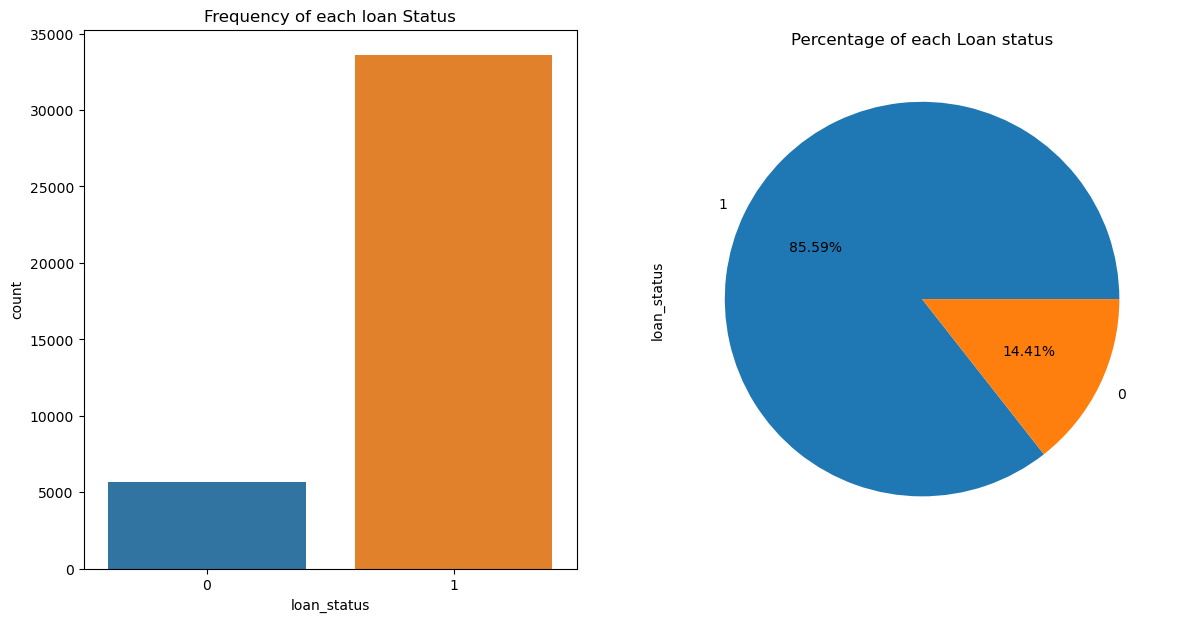

In [82]:
# Defining how many plots wanted(1 = one row, 2 = 2 columns; set the size for the canvas)
fig, axs = plt.subplots(1, 2, figsize = (14, 7))
# Seaborn bar chart using loan_status for the x-axis, take the data from the dataset, set the position of the canvas
sns.countplot(x = 'loan_status', data = loans_2007, ax = axs[0])
# Naming the area assigned to plot 1
axs[0].set_title('Frequency of each loan Status')
# Creates pie chart using matplotlib (ax = axs[1] places it correctly on the canvas, autopct sets the decimal display)
loans_2007.loan_status.value_counts().plot(x = None, y = None, kind = 'pie', ax = axs[1], autopct = '%1.2f%%')
# Name the area assigned to plot 2
axs[1].set_title('Percentage of each Loan status')
plt.show()
